# Crypto Market Analysis – Top 5 Cryptocurrencies

## Introduction
This project analyzes the price evolution, volatility, and correlation of the top 5 cryptocurrencies by market capitalization.

## Business Questions
- How have the top 5 cryptocurrencies evolved over time?
- Which cryptocurrencies are the most volatile?
- Is there a strong correlation between them?
- Does Bitcoin lead the overall crypto market?


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Entorno listo")


Entorno listo


In [40]:
!pip install yfinance


In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd
import yfinance as yf

tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    # Añade aquí el resto de tus tickers
    'XRP': 'XRP-USD'
}

crypto_df = pd.DataFrame()

for name, ticker in tickers.items():
    # Descargamos los datos
    df = yf.download(ticker, start='2019-01-01')
    
    # Extraemos solo la columna 'Close' y le ponemos el nombre de la cripto
    # Nota: Usamos [['Close']] para mantener el formato DataFrame
    if not df.empty:
        # Si yfinance devuelve un MultiIndex, seleccionamos solo el nivel del precio
        if isinstance(df.columns, pd.MultiIndex):
            crypto_df[name] = df['Close'].iloc[:, 0]
        else:
            crypto_df[name] = df['Close']

print(crypto_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                    BTC         ETH       XRP
Date                                         
2019-01-01  3843.520020  140.819412  0.364771
2019-01-02  3943.409424  155.047684  0.375243
2019-01-03  3836.741211  149.135010  0.360224
2019-01-04  3857.717529  154.581940  0.356747
2019-01-05  3845.194580  155.638596  0.355275


In [44]:
crypto_df = crypto_df.sort_values(['coin', 'date'])
crypto_df['daily_return'] = crypto_df.groupby('coin')['price'].pct_change()

crypto_df.head()


,date,price,coin,daily_return
0,2019-01-01,6.075273,BNB,NaN
1,2019-01-02,6.188613,BNB,0.018656
2,2019-01-03,5.903535,BNB,-0.046065
3,2019-01-04,6.065138,BNB,0.027374
4,2019-01-05,6.065543,BNB,0.000067


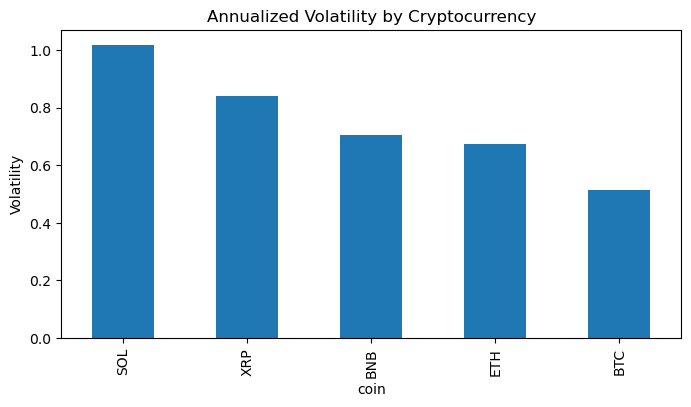

In [45]:
volatility = crypto_df.groupby('coin')['daily_return'].std()

volatility = (volatility * np.sqrt(252)).sort_values(ascending=False)
volatility


volatility.plot(
    kind='bar',
    figsize=(8,4),
    title='Annualized Volatility by Cryptocurrency'
)
plt.ylabel('Volatility')
plt.show()


In [46]:
returns_pivot = crypto_df.pivot(index='date', columns='coin', values='daily_return')
correlation_matrix = returns_pivot.corr()
correlation_matrix


coin,BNB,BTC,ETH,SOL,XRP
coin,,,,,
BNB,1.000000,0.644357,0.668668,0.514436,0.495222
BTC,0.644357,1.000000,0.813238,0.534331,0.568126
ETH,0.668668,0.813238,1.000000,0.604522,0.608347
SOL,0.514436,0.534331,0.604522,1.000000,0.445776
XRP,0.495222,0.568126,0.608347,0.445776,1.000000


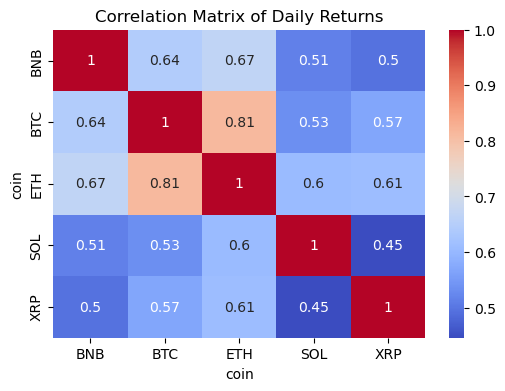

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()


## Key Insights

- Bitcoin and Ethereum show a strong positive correlation, indicating that Bitcoin still leads the crypto market.
- Altcoins such as Solana exhibit higher volatility, suggesting higher risk and speculative behavior.
- During periods of market stress, correlations tend to increase, reducing diversification benefits.


In [48]:
sp500 = yf.download('^GSPC', start='2019-01-01')
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500'})
sp500.head()


[*********************100%***********************]  1 of 1 completed


Price,SP500
Ticker,^GSPC
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912


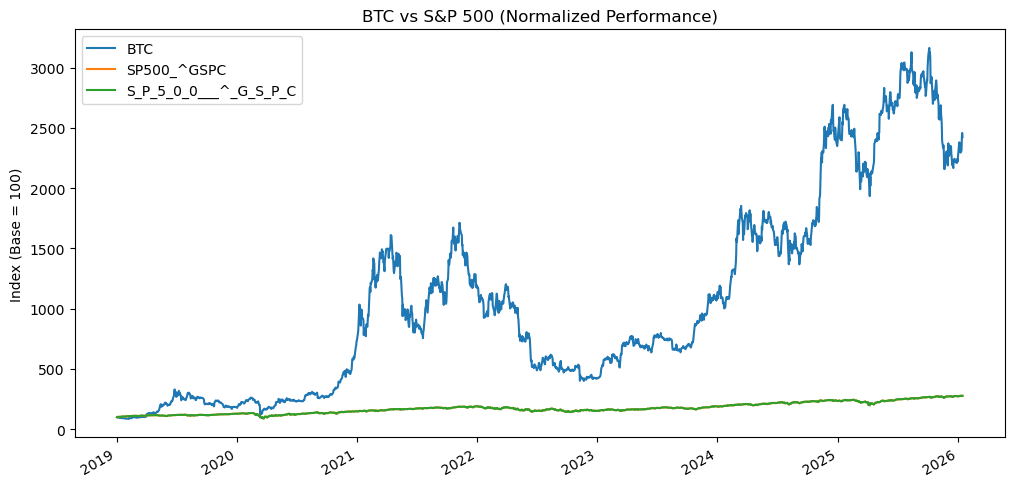

In [51]:
btc_sp_norm = btc_sp / btc_sp.iloc[0] * 100

btc_sp_norm.plot(figsize=(12,6))
plt.title('BTC vs S&P 500 (Normalized Performance)')
plt.ylabel('Index (Base = 100)')
plt.show()


In [52]:
btc_sp_returns = btc_sp.pct_change().dropna()
btc_sp_returns.corr()


,BTC,SP500_^GSPC,S_P_5_0_0___^_G_S_P_C
BTC,1.000000,0.319038,0.319038
SP500_^GSPC,0.319038,1.000000,1.000000
S_P_5_0_0___^_G_S_P_C,0.319038,1.000000,1.000000


# Crypto Market Analysis – Top 5 Cryptocurrencies

## Project Overview
This project analyzes the evolution, volatility, and macroeconomic drivers of the top 5 cryptocurrencies by market capitalization using Python.

## Data Sources
- Yahoo Finance (Cryptocurrency & S&P 500 prices)
- Federal Reserve Economic Data (FRED)

## Key Questions
- How have the top cryptocurrencies evolved over time?
- Which cryptocurrencies exhibit higher volatility?
- How does Bitcoin relate to traditional financial markets?
- What is the impact of inflation and interest rates on crypto prices?

## Key Findings
- Bitcoin and Ethereum lead the crypto market with strong correlations.
- Altcoins such as Solana exhibit significantly higher volatility.
- Bitcoin shows increasing correlation with the S&P 500.
- Rising interest rates negatively impact Bitcoin prices.

## Tools Used
- Python (pandas, numpy, matplotlib, seaborn)
- Jupyter Notebook
- Yahoo Finance API
- FRED

## Limitations
- Macroeconomic data is limited to U.S. indicators.
- Correlation does not imply causation.

## Next Steps
- Extend analysis to additional macro indicators.
- Build an interactive dashboard.
- Apply machine learning for return prediction.


In [7]:
!pip install plotly kaleido



   ---------------------------------------- 0/6 [simplejson]
   ---------------------------------------- 0/6 [simplejson]
   -------------------------- ------------- 4/6 [choreographer]
   -------------------------- ------------- 4/6 [choreographer]
   --------------------------------- ------ 5/6 [kaleido]
   --------------------------------- ------ 5/6 [kaleido]
   --------------------------------- ------ 5/6 [kaleido]
   ---------------------------------------- 6/6 [kaleido]



[*********************100%***********************]  1 of 1 completed
Resorting to unclean kill browser.


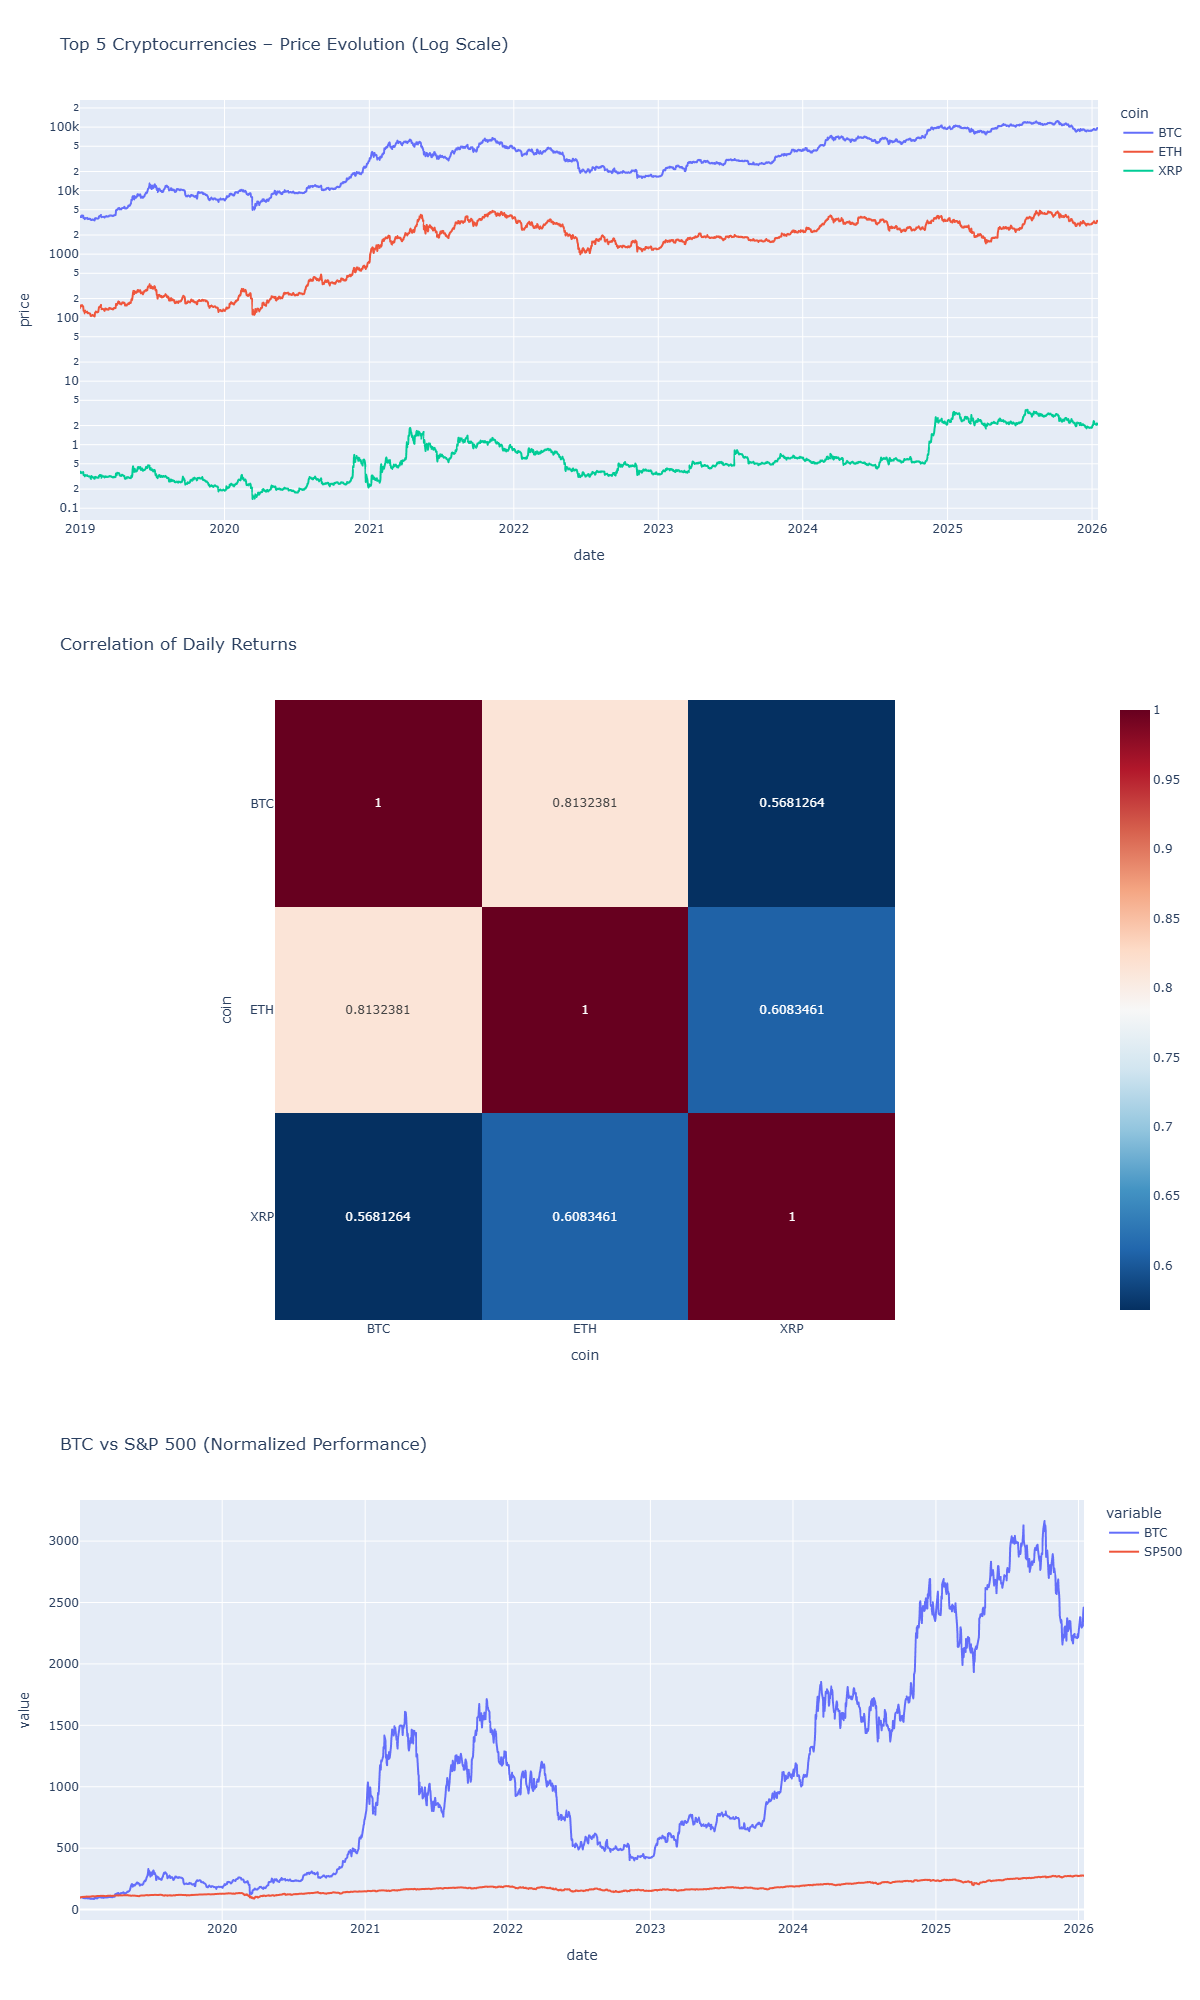

✅ Dashboard completo generado: crypto_dashboard_final.png


In [24]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import yfinance as yf

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import yfinance as yf

if isinstance(crypto_df.columns, pd.MultiIndex):
    crypto_df.columns = crypto_df.columns.get_level_values(1)

if 'coin' not in crypto_df.columns:
    df_temp = crypto_df.reset_index()
    fecha_col = df_temp.columns[0] 
    
    crypto_df_long = df_temp.melt(
        id_vars=[fecha_col], 
        value_vars=[c for c in crypto_df.columns if c != fecha_col],
        var_name='coin',
        value_name='price'
    ).rename(columns={fecha_col: 'date'})
else:
    crypto_df_long = crypto_df.copy()

fig1 = px.line(
    crypto_df_long,
    x='date',
    y='price',
    color='coin',
    title='Top 5 Cryptocurrencies – Price Evolution (Log Scale)'
)
fig1.update_yaxes(type='log')

returns_pivot = crypto_df_long.pivot(index='date', columns='coin', values='price').pct_change()
corr = returns_pivot.corr()

fig2 = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation of Daily Returns'
)

btc_data = crypto_df_long[crypto_df_long['coin']=='BTC'].set_index('date')[['price']]
btc_data = btc_data.rename(columns={'price':'BTC'})

sp500_raw = yf.download('^GSPC', start='2019-01-01')

if isinstance(sp500_raw.columns, pd.MultiIndex):
    sp500 = sp500_raw['Close'].copy()
else:
    sp500 = sp500_raw[['Close']]

sp500.columns = ['SP500']
sp500.index.name = 'date'

btc_sp = btc_data.join(sp500, how='inner').dropna()
btc_sp_norm = btc_sp / btc_sp.iloc[0] * 100 

fig3 = px.line(
    btc_sp_norm,
    x=btc_sp_norm.index,
    y=['BTC', 'SP500'],
    title='BTC vs S&P 500 (Normalized Performance)'
)

fig1.write_image("crypto_prices.png", width=1200, height=600)
fig2.write_image("crypto_correlation.png", width=1200, height=800)
fig3.write_image("btc_vs_sp500.png", width=1200, height=600)

img1 = Image.open("crypto_prices.png")
img2 = Image.open("crypto_correlation.png")
img3 = Image.open("btc_vs_sp500.png")

width = 1200
height = img1.height + img2.height + img3.height
dashboard = Image.new('RGB', (width, height), color=(255,255,255))

dashboard.paste(img1, (0,0))
dashboard.paste(img2, (0,img1.height))
dashboard.paste(img3, (0,img1.height+img2.height))
from IPython.display import display


display(dashboard)
dashboard.save("crypto_dashboard_final.png")

print("✅ Dashboard completo generado: crypto_dashboard_final.png")

In [25]:
import os
print(os.getcwd())

C:\Users\oierl\crypto-market-analysis
